In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import cross_val_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as smf
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn import neighbors, metrics


#import my dataset
data = pd.read_csv('C:\Users\Allison\Documents\GitHub\GeneralAssembly\DS-SF-24\Marseille_Final_Project\ks_school_wellness_policies_clean_csv.csv')

In [2]:
#explore the dataset
data.head()

,District Name,District Number,Year,elem_nutr_gen_atm,mid_nutr_gen_atm,elem_nutr_bkfst,mid_nutr_bkfst,elem_nutr_lunch,mid_nutr_lunch,elem_nutr_a_la_carte,...,six_mean_edfa_math,six_se_edfa_math,seven_mean_edfa_ela,seven_se_edfa_ela,seven_mean_edfa_math,seven_se_edfa_math,eight_mean_edfa_ela,eight_se_edfa_ela,eight_mean_edfa_math,eight_se_edfa_math
0,Abilene,435,2010,B+,B+,E,E,E,E,NaN,...,0.073637,0.060356,0.175573,0.072037,0.348184,0.074271,-0.064195,0.076141,0.252673,0.072944
1,Andover,385,2010,B+,B+,E+,E+,E-,E-,E,...,0.431682,0.043095,0.668914,0.067172,0.345945,0.050462,0.509893,0.054946,0.234616,0.043001
2,Anthony-Harper,361,2010,B+,B,E-,E-,NaN,NaN,NaN,...,-0.245087,0.103889,-0.204939,0.111004,0.210916,0.144562,-0.404794,0.091061,-0.274760,0.101217
3,Arkansas City,470,2010,B+,B+,A,A,A,A,NaN,...,-0.070124,0.065053,0.005581,0.081045,0.019761,0.068405,-0.102936,0.059151,0.016154,0.064384
4,Atchison,409,2010,B+,B+,E-,E,E-,E-,NaN,...,0.015809,0.094373,-0.211118,0.099261,0.006293,0.098217,-0.002524,0.093781,0.019301,0.090991


In [3]:
len(data)

251

In [4]:
my_list = data.columns.values
for i in my_list:
    print i

District Name
District Number
Year
elem_nutr_gen_atm
mid_nutr_gen_atm
elem_nutr_bkfst
mid_nutr_bkfst
elem_nutr_lunch
mid_nutr_lunch
elem_nutr_a_la_carte
mid_nutr_a_la_carte
elem_nutr_vend
mid_nutr_vend
elem_nutr_sch_store
mid_nutr_sch_store
elem_nutr_sch_day
mid_nutr_sch_day
elem_nutr_aft_sch_prog
mid_nutr_aft_sch_prog
elem_ne_gen_guide_and_class
mid_ne_gen_guide_and_class
elem_ne_cafeteria
mid_ne_cafeteria
elem_ne_events_dur_sch_day
mid_ne_events_dur_sch_day
elem_ne_aft_sch_prog
mid_ne_aft_sch_prog
elem_ne_fam_comm
mid_ne_fam_comm
elem_ne_staff_well
mid_ne_staff_well
elem_pa_gen_guide_pe_class
mid_pa_gen_guide_pe_class
elem_pa_thru_day
mid_pa_thru_day
elem_pa_punish
mid_pa_punish
elem_pa_recess
mid_pa_recess
elem_pa_bef_aft_sch
mid_pa_bef_aft_sch
elem_pa_fam_comm
mid_pa_fam_comm
Notes
leaid
leaname
fips
stateabb
year
grade
three_mean_edfa_ela
three_se_edfa_ela
three_mean_edfa_math
three_se_edfa_math
four_mean_edfa_ela
four_se_edfa_ela
four_mean_edfa_math
four_se_edfa_math
five_mean_ed

In [5]:
data.describe()

C:\Users\Allison\Anaconda2\lib\site-packages\numpy\lib\function_base.py:3823: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,District Number,Year,Notes,leaid,fips,year,grade,three_mean_edfa_ela,three_se_edfa_ela,three_mean_edfa_math,...,six_mean_edfa_math,six_se_edfa_math,seven_mean_edfa_ela,seven_se_edfa_ela,seven_mean_edfa_math,seven_se_edfa_math,eight_mean_edfa_ela,eight_se_edfa_ela,eight_mean_edfa_math,eight_se_edfa_math
count,251.000000,251.0,0.0,2.510000e+02,251.0,251.0,251.000000,220.000000,220.000000,220.000000,...,219.000000,219.000000,226.000000,226.000000,226.000000,226.000000,228.000000,228.000000,229.000000,229.000000
mean,352.549801,2010.0,NaN,2.007587e+06,20.0,2010.0,3.318725,0.060373,0.128779,0.040563,...,0.054989,0.119010,0.012370,0.131012,0.019314,0.124437,0.049950,0.128113,0.037101,0.123538
std,99.059904,0.0,NaN,3.439995e+03,0.0,0.0,0.996999,0.289454,0.050048,0.307185,...,0.343802,0.043349,0.291672,0.049684,0.360863,0.049426,0.280918,0.048205,0.334971,0.047096
min,101.000000,2010.0,NaN,2.000001e+06,20.0,2010.0,3.000000,-0.792894,0.016431,-0.734705,...,-0.827827,0.015950,-0.748603,0.018052,-0.795048,0.018335,-0.691615,0.018767,-0.802230,0.020203
25%,270.500000,2010.0,NaN,2.005160e+06,20.0,2010.0,3.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,358.000000,2010.0,NaN,2.007740e+06,20.0,2010.0,3.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,437.000000,2010.0,NaN,2.010425e+06,20.0,2010.0,3.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,512.000000,2010.0,NaN,2.013110e+06,20.0,2010.0,8.000000,0.889860,0.231707,0.745791,...,0.897513,0.204389,0.996598,0.228141,1.454810,0.261316,1.058775,0.252078,1.314681,0.241432


In [6]:
#delete columns I know I won't be using
del data['three_se_edfa_ela']
del data['three_se_edfa_math']
del data['four_se_edfa_ela']
del data['four_se_edfa_math']
del data['five_se_edfa_ela']
del data['five_se_edfa_math']
del data['six_se_edfa_ela']
del data['six_se_edfa_math']
del data['seven_se_edfa_ela']
del data['seven_se_edfa_math']
del data['eight_se_edfa_ela']
del data['eight_se_edfa_math']
del data['Notes']
del data['leaid']
del data['leaname']
del data['fips']
del data['stateabb']
del data['year']
del data['grade']
del data['District Number']
del data['Year']

#delete columns with greater than 15% missing observations (I did this in Excel. How to see all of data.describe?)
del data['mid_pa_recess']
del data['elem_nutr_sch_store']
del data['mid_ne_aft_sch_prog']
del data['elem_ne_aft_sch_prog']
del data['mid_nutr_aft_sch_prog']
del data['elem_nutr_aft_sch_prog']
del data['mid_nutr_sch_store']
del data['elem_nutr_vend']
del data['elem_nutr_a_la_carte']
del data['mid_nutr_a_la_carte']
del data['mid_nutr_vend']
del data['elem_pa_bef_aft_sch']
del data['mid_pa_bef_aft_sch']

data.head()

,District Name,elem_nutr_gen_atm,mid_nutr_gen_atm,elem_nutr_bkfst,mid_nutr_bkfst,elem_nutr_lunch,mid_nutr_lunch,elem_nutr_sch_day,mid_nutr_sch_day,elem_ne_gen_guide_and_class,...,four_mean_edfa_ela,four_mean_edfa_math,five_mean_edfa_ela,five_mean_edfa_math,six_mean_edfa_ela,six_mean_edfa_math,seven_mean_edfa_ela,seven_mean_edfa_math,eight_mean_edfa_ela,eight_mean_edfa_math
0,Abilene,B+,B+,E,E,E,E,A+,A+,A,...,-0.012612,-0.200108,0.127019,-0.135540,0.126632,0.073637,0.175573,0.348184,-0.064195,0.252673
1,Andover,B+,B+,E+,E+,E-,E-,A-,A-,B+,...,0.302901,0.341898,0.533983,0.594967,0.435067,0.431682,0.668914,0.345945,0.509893,0.234616
2,Anthony-Harper,B+,B,E-,E-,NaN,NaN,A,A,E-,...,0.089148,0.055699,0.107402,0.460087,-0.278540,-0.245087,-0.204939,0.210916,-0.404794,-0.274760
3,Arkansas City,B+,B+,A,A,A,A,B+,B+,A-,...,-0.153506,-0.016027,0.000737,0.057150,0.008406,-0.070124,0.005581,0.019761,-0.102936,0.016154
4,Atchison,B+,B+,E-,E,E-,E-,A+,A+,B,...,-0.406145,-0.616993,-0.196663,-0.194538,0.004002,0.015809,-0.211118,0.006293,-0.002524,0.019301


In [7]:
#replace the wellness policy scores with numbers (Basic(B), Advanced(A), and Exemplary(E))
data.replace(to_replace = ('B-', 'B', 'B+', 'A-', 'A', 'A+', 'E-', 'E', 'E+'), value = (1, 2, 3, 4, 5, 6, 7, 8, 9), inplace = True)

data.head()

,District Name,elem_nutr_gen_atm,mid_nutr_gen_atm,elem_nutr_bkfst,mid_nutr_bkfst,elem_nutr_lunch,mid_nutr_lunch,elem_nutr_sch_day,mid_nutr_sch_day,elem_ne_gen_guide_and_class,...,four_mean_edfa_ela,four_mean_edfa_math,five_mean_edfa_ela,five_mean_edfa_math,six_mean_edfa_ela,six_mean_edfa_math,seven_mean_edfa_ela,seven_mean_edfa_math,eight_mean_edfa_ela,eight_mean_edfa_math
0,Abilene,3.0,3.0,8.0,8.0,8.0,8.0,6.0,6.0,5.0,...,-0.012612,-0.200108,0.127019,-0.135540,0.126632,0.073637,0.175573,0.348184,-0.064195,0.252673
1,Andover,3.0,3.0,9.0,9.0,7.0,7.0,4.0,4.0,3.0,...,0.302901,0.341898,0.533983,0.594967,0.435067,0.431682,0.668914,0.345945,0.509893,0.234616
2,Anthony-Harper,3.0,2.0,7.0,7.0,NaN,NaN,5.0,5.0,7.0,...,0.089148,0.055699,0.107402,0.460087,-0.278540,-0.245087,-0.204939,0.210916,-0.404794,-0.274760
3,Arkansas City,3.0,3.0,5.0,5.0,5.0,5.0,3.0,3.0,4.0,...,-0.153506,-0.016027,0.000737,0.057150,0.008406,-0.070124,0.005581,0.019761,-0.102936,0.016154
4,Atchison,3.0,3.0,7.0,8.0,7.0,7.0,6.0,6.0,2.0,...,-0.406145,-0.616993,-0.196663,-0.194538,0.004002,0.015809,-0.211118,0.006293,-0.002524,0.019301


In [8]:
#drop missing values

len(data)

251

In [9]:
#print data.count()
dropped_data = data.dropna(how='any', inplace=False)
#dropped_data.count()
#rs  = []
#for i in dropped_data.keys():
#    if i.startswith("elem"):
#        rs.append(i)
#print rs

In [10]:
len(dropped_data)


138

In [11]:
print data.corr()

                             elem_nutr_gen_atm  mid_nutr_gen_atm  \
elem_nutr_gen_atm                     1.000000          0.693589   
mid_nutr_gen_atm                      0.693589          1.000000   
elem_nutr_bkfst                       0.143740          0.032878   
mid_nutr_bkfst                        0.132659          0.061135   
elem_nutr_lunch                       0.068667          0.008011   
mid_nutr_lunch                        0.050501          0.019324   
elem_nutr_sch_day                     0.062104         -0.053492   
mid_nutr_sch_day                     -0.001984         -0.020098   
elem_ne_gen_guide_and_class           0.210218          0.100705   
mid_ne_gen_guide_and_class            0.167983          0.095694   
elem_ne_cafeteria                     0.108874         -0.016293   
mid_ne_cafeteria                      0.089358         -0.022122   
elem_ne_events_dur_sch_day            0.026134          0.031534   
mid_ne_events_dur_sch_day            -0.010843  

In [12]:
#new ds with columns of average nutrition, nutrition education, and physical activity scores... perhaps average of all scores
#for a wp topic (nutrition, nutrition ed, physical activity) will work better. desperate, perhaps. but we'll see what we get.

avg_data = pd.read_csv('C:\Users\Allison\Documents\GitHub\GeneralAssembly\DS-SF-24\Marseille_Final_Project\ks_school_wellness_policies_clean_csv3.csv')

In [13]:
avg_data.head()

,avg_elem_nutr_score,avg_mid_nutr_score,avg_elem_ne_scores,avg_mid_ne_scores,avg_elem_pa_scores,avg_mid_pa_scores,three_mean_edfa_ela,three_se_edfa_ela,three_mean_edfa_math,three_se_edfa_math,...,six_mean_edfa_math,six_se_edfa_math,seven_mean_edfa_ela,seven_se_edfa_ela,seven_mean_edfa_math,seven_se_edfa_math,eight_mean_edfa_ela,eight_se_edfa_ela,eight_mean_edfa_math,eight_se_edfa_math
0,6.8,7.142857,7.000000,5.833333,4.500000,4.166667,-0.098640,0.071126,-0.251232,0.077591,...,0.073637,0.060356,0.175573,0.072037,0.348184,0.074271,-0.064195,0.076141,0.252673,0.072944
1,6.2,5.833333,2.200000,1.800000,2.166667,3.000000,0.226781,0.048298,0.111297,0.056068,...,0.431682,0.043095,0.668914,0.067172,0.345945,0.050462,0.509893,0.054946,0.234616,0.043001
2,5.0,4.666667,7.600000,7.600000,5.142857,4.666667,-0.283679,0.165077,-0.013566,0.177328,...,-0.245087,0.103889,-0.204939,0.111004,0.210916,0.144562,-0.404794,0.091061,-0.274760,0.101217
3,4.4,5.000000,4.666667,5.166667,3.571429,3.666667,-0.317832,0.065432,-0.028950,0.074294,...,-0.070124,0.065053,0.005581,0.081045,0.019761,0.068405,-0.102936,0.059151,0.016154,0.064384
4,6.5,6.666667,5.333333,5.500000,4.571429,4.333333,-0.357967,0.087888,-0.486108,0.096899,...,0.015809,0.094373,-0.211118,0.099261,0.006293,0.098217,-0.002524,0.093781,0.019301,0.090991


In [14]:
my_list = avg_data.columns.values
for i in my_list:
    print i

avg_elem_nutr_score
avg_mid_nutr_score
avg_elem_ne_scores
avg_mid_ne_scores
avg_elem_pa_scores
avg_mid_pa_scores
three_mean_edfa_ela
three_se_edfa_ela
three_mean_edfa_math
three_se_edfa_math
four_mean_edfa_ela
four_se_edfa_ela
four_mean_edfa_math
four_se_edfa_math
five_mean_edfa_ela
five_se_edfa_ela
five_mean_edfa_math
five_se_edfa_math
six_mean_edfa_ela
six_se_edfa_ela
six_mean_edfa_math
six_se_edfa_math
seven_mean_edfa_ela
seven_se_edfa_ela
seven_mean_edfa_math
seven_se_edfa_math
eight_mean_edfa_ela
eight_se_edfa_ela
eight_mean_edfa_math
eight_se_edfa_math


In [15]:
#drop missing values

dropped_avg_data = avg_data.dropna(how='any', inplace=False)

len(dropped_avg_data)

186

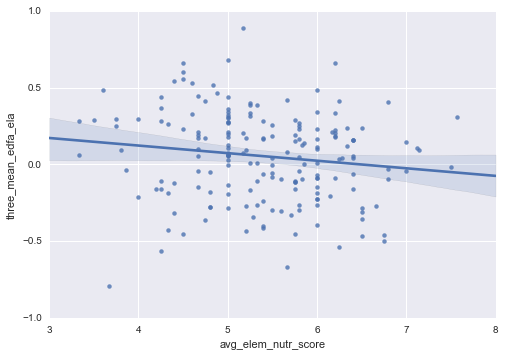

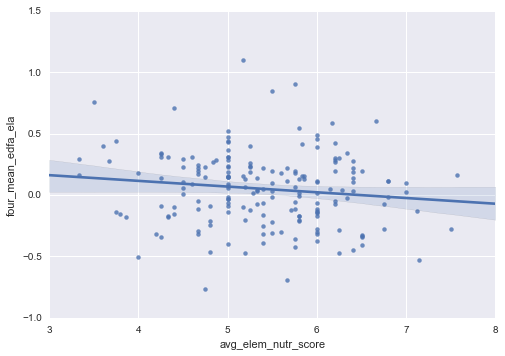

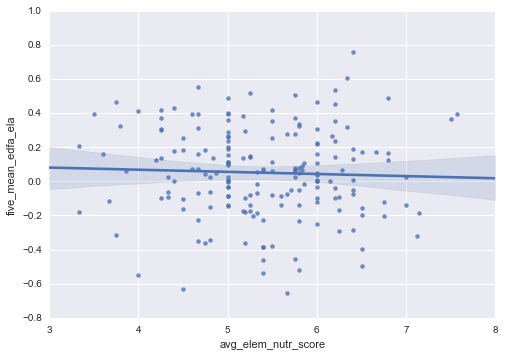

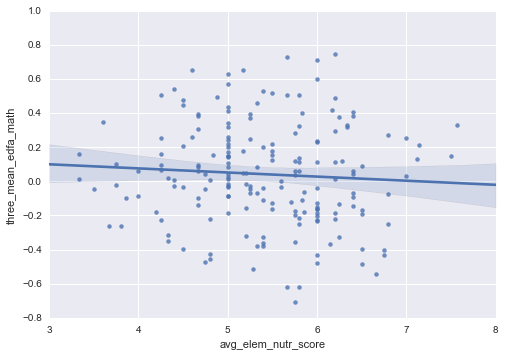

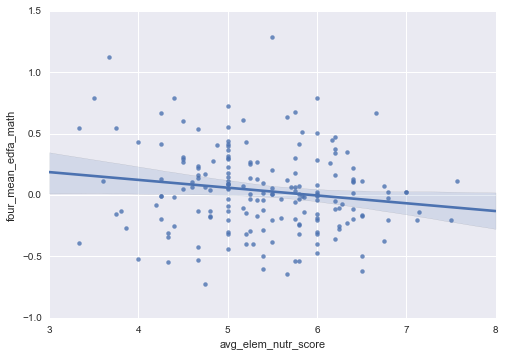

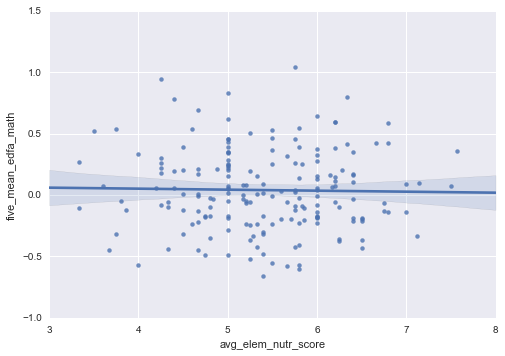

In [16]:
#let's look at nutrition-related wellness policy components in elementary school  

sns.regplot(dropped_avg_data.avg_elem_nutr_score, dropped_avg_data.three_mean_edfa_ela)
plt.show()

sns.regplot(dropped_avg_data.avg_elem_nutr_score, dropped_avg_data.four_mean_edfa_ela)
plt.show()

sns.regplot(dropped_avg_data.avg_elem_nutr_score, dropped_avg_data.five_mean_edfa_ela)
plt.show()

sns.regplot(dropped_avg_data.avg_elem_nutr_score, dropped_avg_data.three_mean_edfa_math)
plt.show()

sns.regplot(dropped_avg_data.avg_elem_nutr_score, dropped_avg_data.four_mean_edfa_math)
plt.show()

sns.regplot(dropped_avg_data.avg_elem_nutr_score, dropped_avg_data.five_mean_edfa_math)
plt.show()

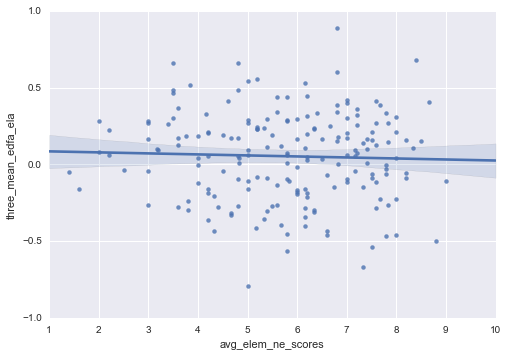

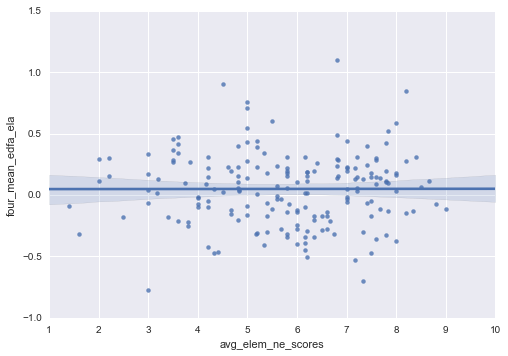

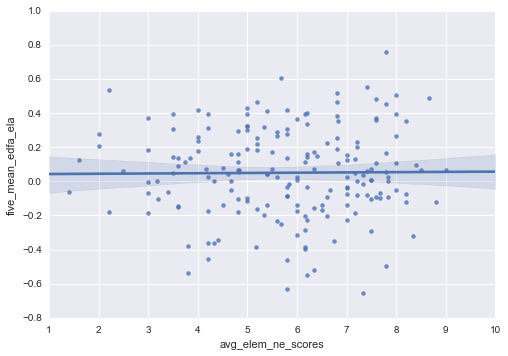

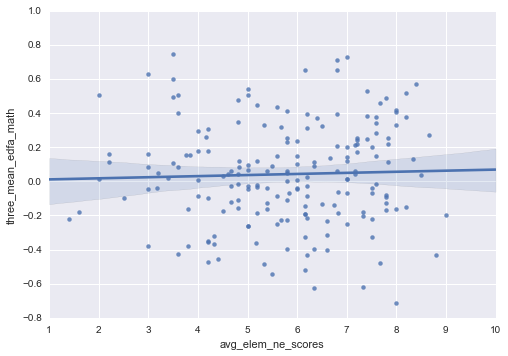

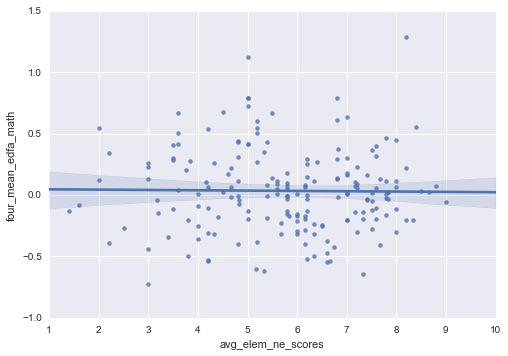

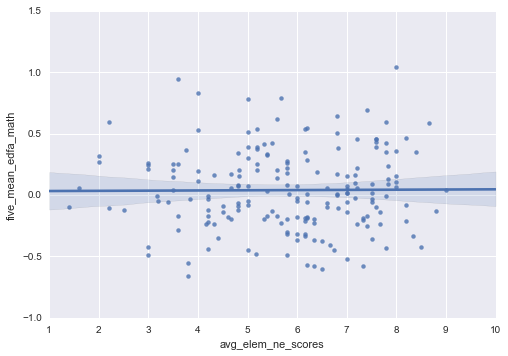

In [17]:
#let's look at nutrition education-related wellness policy components in elementary school  

sns.regplot(dropped_avg_data.avg_elem_ne_scores, dropped_avg_data.three_mean_edfa_ela)
plt.show()

sns.regplot(dropped_avg_data.avg_elem_ne_scores, dropped_avg_data.four_mean_edfa_ela)
plt.show()

sns.regplot(dropped_avg_data.avg_elem_ne_scores, dropped_avg_data.five_mean_edfa_ela)
plt.show()

sns.regplot(dropped_avg_data.avg_elem_ne_scores, dropped_avg_data.three_mean_edfa_math)
plt.show()

sns.regplot(dropped_avg_data.avg_elem_ne_scores, dropped_avg_data.four_mean_edfa_math)
plt.show()

sns.regplot(dropped_avg_data.avg_elem_ne_scores, dropped_avg_data.five_mean_edfa_math)
plt.show()

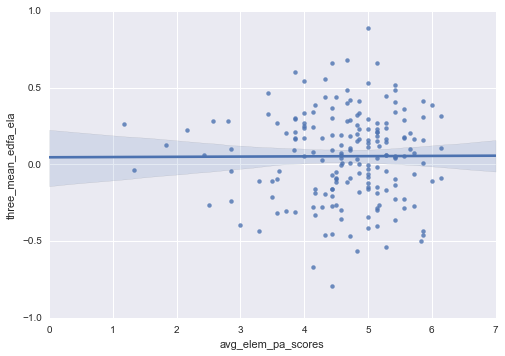

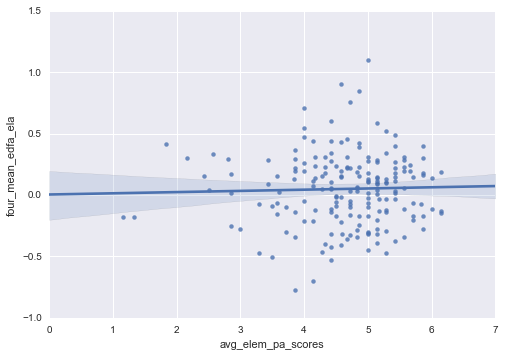

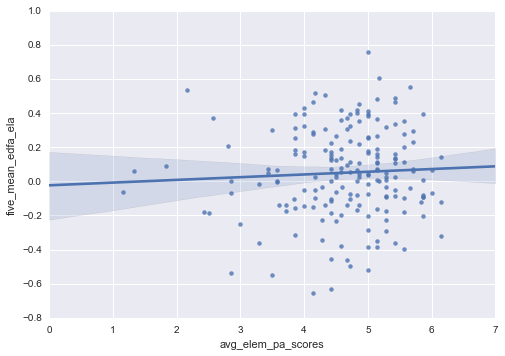

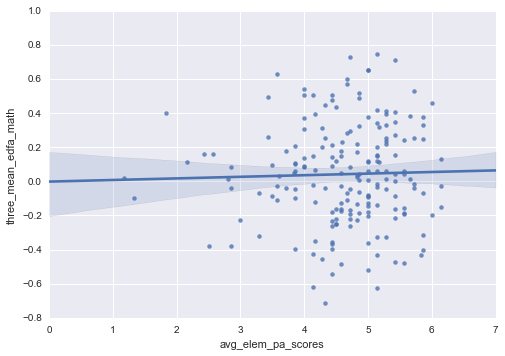

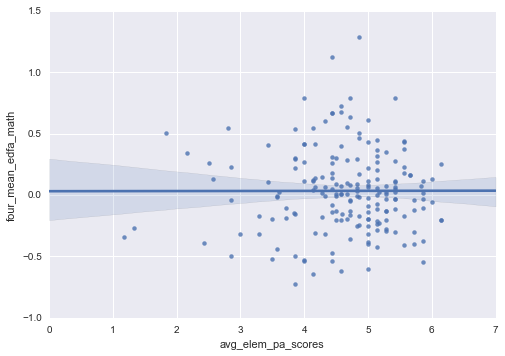

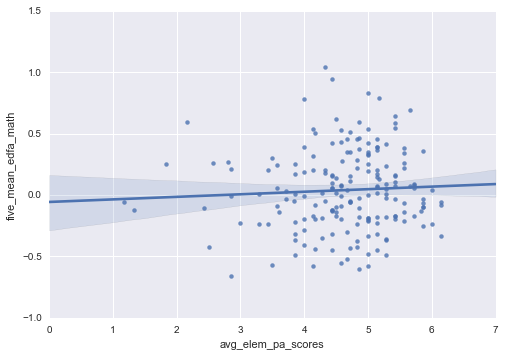

In [18]:
#let's look at physical activity-related wellness policy components in elementary school  

sns.regplot(dropped_avg_data.avg_elem_pa_scores, dropped_avg_data.three_mean_edfa_ela)
plt.show()

sns.regplot(dropped_avg_data.avg_elem_pa_scores, dropped_avg_data.four_mean_edfa_ela)
plt.show()

sns.regplot(dropped_avg_data.avg_elem_pa_scores, dropped_avg_data.five_mean_edfa_ela)
plt.show()

sns.regplot(dropped_avg_data.avg_elem_pa_scores, dropped_avg_data.three_mean_edfa_math)
plt.show()

sns.regplot(dropped_avg_data.avg_elem_pa_scores, dropped_avg_data.four_mean_edfa_math)
plt.show()

sns.regplot(dropped_avg_data.avg_elem_pa_scores, dropped_avg_data.five_mean_edfa_math)
plt.show()

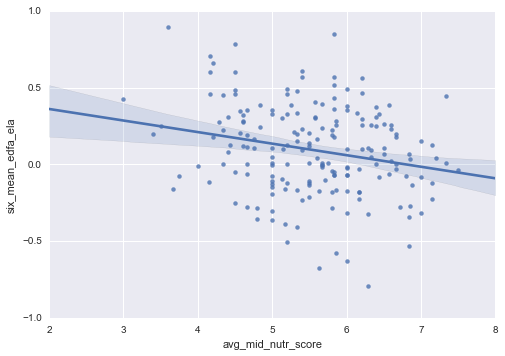

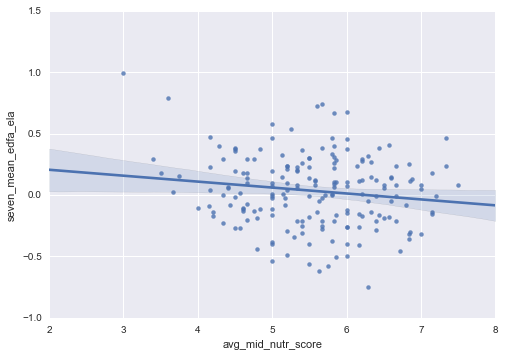

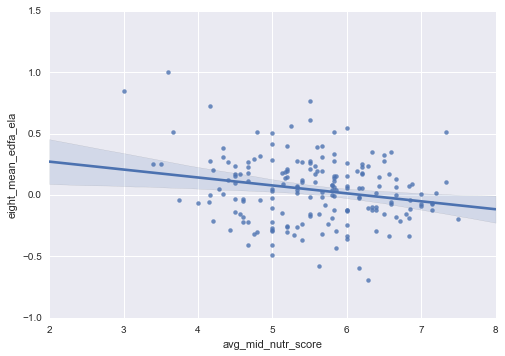

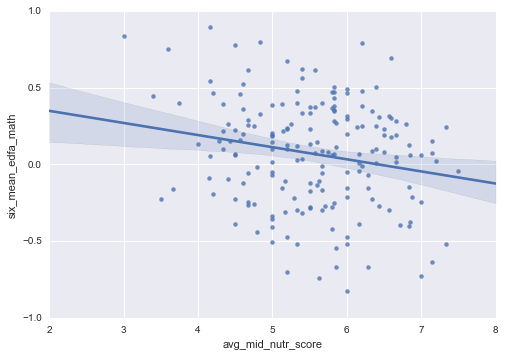

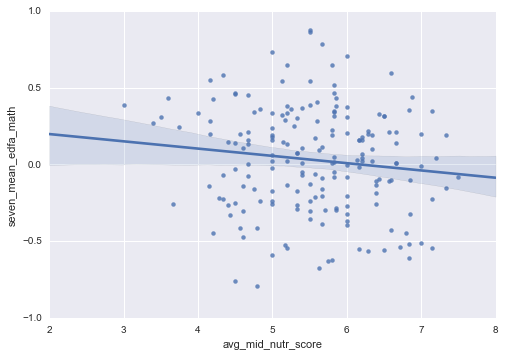

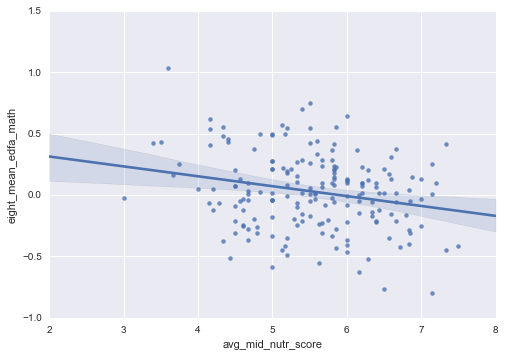

In [19]:
#let's look at nutrition-related wellness policy components in middle school  

sns.regplot(dropped_avg_data.avg_mid_nutr_score, dropped_avg_data.six_mean_edfa_ela)
plt.show()

sns.regplot(dropped_avg_data.avg_mid_nutr_score, dropped_avg_data.seven_mean_edfa_ela)
plt.show()

sns.regplot(dropped_avg_data.avg_mid_nutr_score, dropped_avg_data.eight_mean_edfa_ela)
plt.show()

sns.regplot(dropped_avg_data.avg_mid_nutr_score, dropped_avg_data.six_mean_edfa_math)
plt.show()

sns.regplot(dropped_avg_data.avg_mid_nutr_score, dropped_avg_data.seven_mean_edfa_math)
plt.show()

sns.regplot(dropped_avg_data.avg_mid_nutr_score, dropped_avg_data.eight_mean_edfa_math)
plt.show()

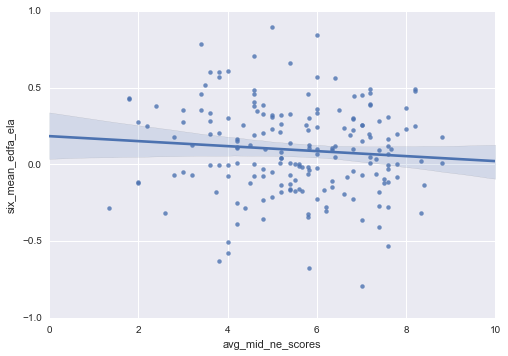

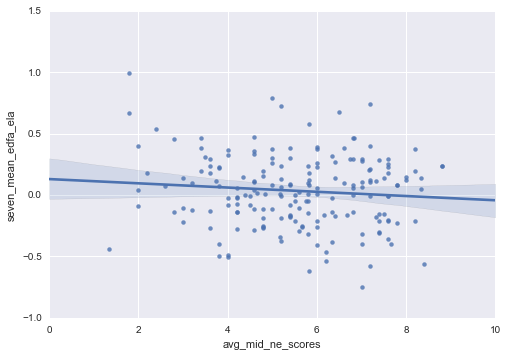

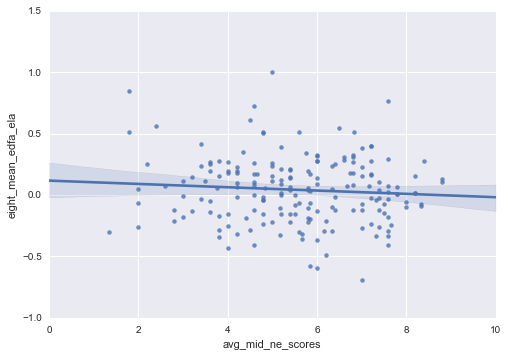

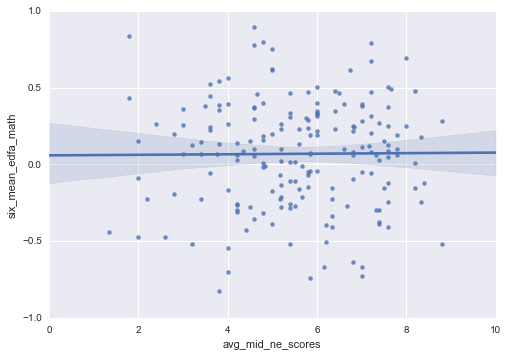

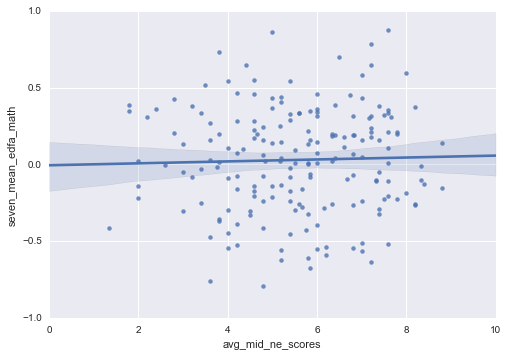

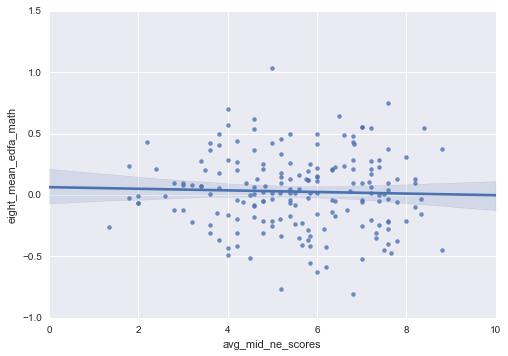

In [20]:
#let's look at nutrition education-related wellness policy components in middle school  

sns.regplot(dropped_avg_data.avg_mid_ne_scores, dropped_avg_data.six_mean_edfa_ela)
plt.show()

sns.regplot(dropped_avg_data.avg_mid_ne_scores, dropped_avg_data.seven_mean_edfa_ela)
plt.show()

sns.regplot(dropped_avg_data.avg_mid_ne_scores, dropped_avg_data.eight_mean_edfa_ela)
plt.show()

sns.regplot(dropped_avg_data.avg_mid_ne_scores, dropped_avg_data.six_mean_edfa_math)
plt.show()

sns.regplot(dropped_avg_data.avg_mid_ne_scores, dropped_avg_data.seven_mean_edfa_math)
plt.show()

sns.regplot(dropped_avg_data.avg_mid_ne_scores, dropped_avg_data.eight_mean_edfa_math)
plt.show()

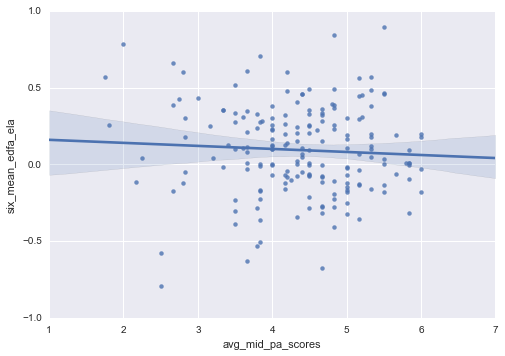

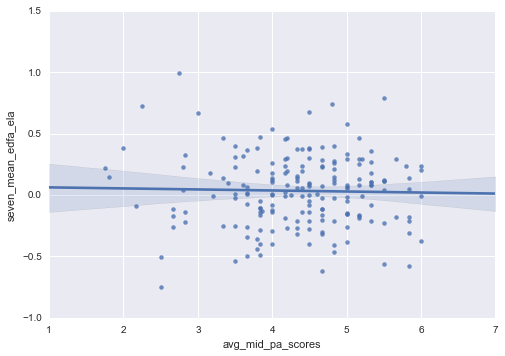

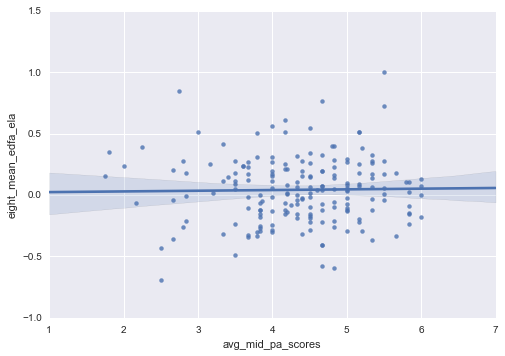

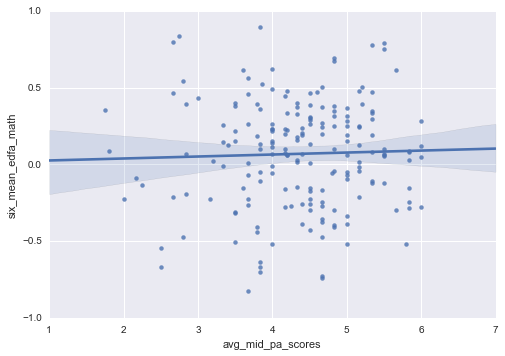

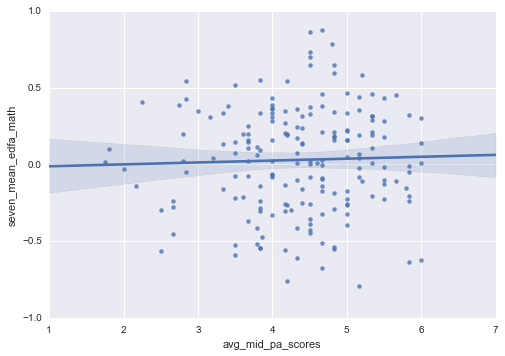

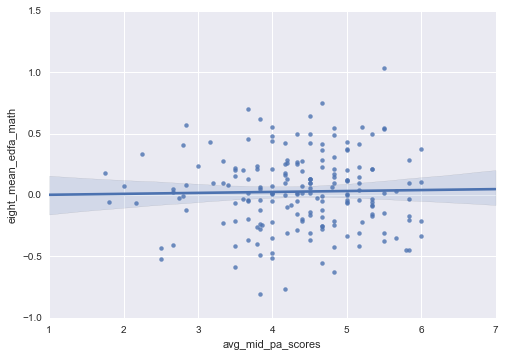

In [21]:
#let's look at physical activity-related wellness policy components in middle school  

sns.regplot(dropped_avg_data.avg_mid_pa_scores, dropped_avg_data.six_mean_edfa_ela)
plt.show()

sns.regplot(dropped_avg_data.avg_mid_pa_scores, dropped_avg_data.seven_mean_edfa_ela)
plt.show()

sns.regplot(dropped_avg_data.avg_mid_pa_scores, dropped_avg_data.eight_mean_edfa_ela)
plt.show()

sns.regplot(dropped_avg_data.avg_mid_pa_scores, dropped_avg_data.six_mean_edfa_math)
plt.show()

sns.regplot(dropped_avg_data.avg_mid_pa_scores, dropped_avg_data.seven_mean_edfa_math)
plt.show()

sns.regplot(dropped_avg_data.avg_mid_pa_scores, dropped_avg_data.eight_mean_edfa_math)
plt.show()

In [22]:
dropped_avg_data.corr()

,avg_elem_nutr_score,avg_mid_nutr_score,avg_elem_ne_scores,avg_mid_ne_scores,avg_elem_pa_scores,avg_mid_pa_scores,three_mean_edfa_ela,three_se_edfa_ela,three_mean_edfa_math,three_se_edfa_math,...,six_mean_edfa_math,six_se_edfa_math,seven_mean_edfa_ela,seven_se_edfa_ela,seven_mean_edfa_math,seven_se_edfa_math,eight_mean_edfa_ela,eight_se_edfa_ela,eight_mean_edfa_math,eight_se_edfa_math
avg_elem_nutr_score,1.000000,0.846815,0.430037,0.393602,0.327059,0.235428,-0.143999,-0.176139,-0.068014,-0.157334,...,-0.126949,-0.200399,-0.104801,-0.087786,-0.094773,-0.075114,-0.158037,-0.134786,-0.164383,-0.133097
avg_mid_nutr_score,0.846815,1.000000,0.435405,0.429826,0.280110,0.246165,-0.169527,-0.265444,-0.107184,-0.270748,...,-0.201396,-0.269735,-0.147131,-0.202364,-0.123152,-0.201794,-0.212933,-0.239527,-0.232752,-0.230854
avg_elem_ne_scores,0.430037,0.435405,1.000000,0.914428,0.603624,0.519329,-0.037692,0.004808,0.035211,-0.003579,...,0.044617,-0.040441,-0.066518,0.026553,0.048634,0.037270,-0.075191,0.024524,-0.023913,0.037953
avg_mid_ne_scores,0.393602,0.429826,0.914428,1.000000,0.561787,0.548620,-0.067398,-0.004049,0.018663,-0.023481,...,0.008419,-0.062072,-0.096829,0.006664,0.030109,0.006337,-0.081734,-0.002933,-0.034802,0.016759
avg_elem_pa_scores,0.327059,0.280110,0.603624,0.561787,1.000000,0.737036,0.004574,0.160686,0.027921,0.142227,...,0.047161,0.087350,-0.047335,0.179203,0.013594,0.160421,-0.044621,0.134646,-0.021437,0.175262
avg_mid_pa_scores,0.235428,0.246165,0.519329,0.548620,0.737036,1.000000,-0.014030,0.069451,-0.006160,0.029483,...,0.033095,0.008732,-0.025695,0.050128,0.032245,0.034887,0.018574,0.083317,0.022304,0.089527
three_mean_edfa_ela,-0.143999,-0.169527,-0.037692,-0.067398,0.004574,-0.014030,1.000000,0.128048,0.755991,0.150294,...,0.320204,0.138201,0.426696,0.147740,0.212118,0.073599,0.372648,0.107834,0.335059,0.114902
three_se_edfa_ela,-0.176139,-0.265444,0.004808,-0.004049,0.160686,0.069451,0.128048,1.000000,0.106952,0.956332,...,0.104850,0.890027,0.031605,0.884359,0.024945,0.880220,0.120367,0.897014,0.123153,0.897051
three_mean_edfa_math,-0.068014,-0.107184,0.035211,0.018663,0.027921,-0.006160,0.755991,0.106952,1.000000,0.200578,...,0.232448,0.087478,0.335985,0.137454,0.197938,0.072893,0.345054,0.092930,0.296962,0.107181
three_se_edfa_math,-0.157334,-0.270748,-0.003579,-0.023481,0.142227,0.029483,0.150294,0.956332,0.200578,1.000000,...,0.071834,0.867752,0.010596,0.861072,0.023061,0.866469,0.099605,0.866064,0.103614,0.869949


In [24]:
#X1 = DataDroppedElemNutrGenAtm[['elem_nutr_bkfst', 
#                                'elem_nutr_lunch', 
#                                'elem_nutr_sch_day',
#                                'elem_ne_gen_guide_and_class', 
#                                'elem_ne_cafeteria', 
#                                'elem_ne_events_dur_sch_day', 
#                                'elem_ne_fam_comm',
#                                'elem_ne_staff_well', 
#                                'elem_pa_gen_guide_pe_class',
#                                'elem_pa_thru_day', 
#                                'elem_pa_recess']]
#y1 = DataDroppedElemNutrGenAtm['elem_nutr_gen_atm']

#lm1 = smf.ols(formula = 'y1 ~ X1', data = DataDroppedElemNutrGenAtm).fit()

#print zip(('intercept',
#           'elem_nutr_bkfst', 
#           'elem_nutr_lunch', 
#           'elem_nutr_sch_day',
#           'elem_ne_gen_guide_and_class', 
#           'elem_ne_cafeteria', 
#           'elem_ne_events_dur_sch_day', 
#           'elem_ne_fam_comm',
#           'elem_ne_staff_well', 
#           'elem_pa_gen_guide_pe_class',
#           'elem_pa_thru_day', 
#           'elem_pa_recess'), lm1.pvalues)


In [26]:
#Just two variables are significant (which makes sense since I feel like my variables are fairly independent)
#significant variables: elem_ne_gen_guide_and_class, elem_pa_recess

#X2 = DataDroppedElemNutrGenAtm[['elem_ne_gen_guide_and_class',
#                               'elem_pa_recess']]
#y2 = DataDroppedElemNutrGenAtm['elem_nutr_gen_atm']

#lm2 = smf.ols(formula = 'y2 ~ X2', data = DataDroppedElemNutrGenAtm).fit()

#print lm2.pvalues

In [28]:
#followed example from lecture 6, but clearly am missing something... ideas?

##lm = LinearRegression()

#lm.fit(X2, y2)

##X3 = data[['elem_ne_gen_guide_and_class',
##          'elem_pa_recess']]

##X3.describe()
#data['elem_nutr_gen_atm_predict'] = lm.predict(X3)
#data['elem_nutr_gen_atm'].fillna(value = data['elem_nutr_gen_atm_predict'], inplace = True)

In [29]:
total_data = pd.read_csv('C:\Users\Allison\Documents\GitHub\GeneralAssembly\DS-SF-24\Marseille_Final_Project\ks_school_wellness_policies_csv_sum.csv')

In [30]:
len(total_data)

251

In [31]:
total_data.head()

,sum_elem_nutr_score,sum_mid_nutr_score,sum_elem_ne_scores,sum_mid_ne_scores,sum_elem_pa_scores,avg_mid_pa_scores,total_elem_wp,total_mid_wp,three_mean_edfa_ela,three_se_edfa_ela,...,six_mean_edfa_math,six_se_edfa_math,seven_mean_edfa_ela,seven_se_edfa_ela,seven_mean_edfa_math,seven_se_edfa_math,eight_mean_edfa_ela,eight_se_edfa_ela,eight_mean_edfa_math,eight_se_edfa_math
0,34,50,42,35,27,25,103,110,-0.098640,0.071126,...,0.073637,0.060356,0.175573,0.072037,0.348184,0.074271,-0.064195,0.076141,0.252673,0.072944
1,31,35,11,9,13,15,55,59,0.226781,0.048298,...,0.431682,0.043095,0.668914,0.067172,0.345945,0.050462,0.509893,0.054946,0.234616,0.043001
2,15,14,38,38,36,28,89,80,-0.283679,0.165077,...,-0.245087,0.103889,-0.204939,0.111004,0.210916,0.144562,-0.404794,0.091061,-0.274760,0.101217
3,22,35,28,31,25,22,75,88,-0.317832,0.065432,...,-0.070124,0.065053,0.005581,0.081045,0.019761,0.068405,-0.102936,0.059151,0.016154,0.064384
4,39,40,32,33,32,26,103,99,-0.357967,0.087888,...,0.015809,0.094373,-0.211118,0.099261,0.006293,0.098217,-0.002524,0.093781,0.019301,0.090991


In [32]:
dropped_total_data = total_data.dropna(how='any', inplace=False)

In [33]:
len(dropped_total_data)

190

In [34]:
dropped_total_data.corr()

,sum_elem_nutr_score,sum_mid_nutr_score,sum_elem_ne_scores,sum_mid_ne_scores,sum_elem_pa_scores,avg_mid_pa_scores,total_elem_wp,total_mid_wp,three_mean_edfa_ela,three_se_edfa_ela,...,six_mean_edfa_math,six_se_edfa_math,seven_mean_edfa_ela,seven_se_edfa_ela,seven_mean_edfa_math,seven_se_edfa_math,eight_mean_edfa_ela,eight_se_edfa_ela,eight_mean_edfa_math,eight_se_edfa_math
sum_elem_nutr_score,1.000000,0.670665,0.378393,0.292718,0.175947,0.166497,0.685198,0.511755,-0.137812,-0.278221,...,-0.123743,-0.278298,-0.081486,-0.221257,-0.136982,-0.201020,-0.147637,-0.246858,-0.123080,-0.252689
sum_mid_nutr_score,0.670665,1.000000,0.355633,0.412867,0.152423,0.273427,0.524048,0.760463,-0.155891,-0.394251,...,-0.202035,-0.397058,-0.152768,-0.345544,-0.116779,-0.355594,-0.241106,-0.394320,-0.158606,-0.402612
sum_elem_ne_scores,0.378393,0.355633,1.000000,0.871091,0.538939,0.451895,0.869282,0.727457,-0.035414,-0.089837,...,0.010756,-0.126492,-0.064130,-0.044557,0.037695,-0.025673,-0.104061,-0.073694,-0.058721,-0.063537
sum_mid_ne_scores,0.292718,0.412867,0.871091,1.000000,0.490708,0.551055,0.749265,0.848112,-0.083156,-0.043409,...,-0.025561,-0.097967,-0.136840,-0.022328,-0.014251,-0.017852,-0.145508,-0.039297,-0.095465,-0.040053
sum_elem_pa_scores,0.175947,0.152423,0.538939,0.490708,1.000000,0.694124,0.717964,0.534142,0.041090,0.120862,...,0.026845,0.053368,-0.071709,0.123690,0.002126,0.128092,-0.057080,0.071505,-0.014866,0.105988
avg_mid_pa_scores,0.166497,0.273427,0.451895,0.551055,0.694124,1.000000,0.556926,0.722339,-0.022166,0.054603,...,0.078747,-0.001359,-0.082105,0.022796,-0.004466,0.028747,-0.022031,0.046553,0.016569,0.029598
total_elem_wp,0.685198,0.524048,0.869282,0.749265,0.717964,0.556926,1.000000,0.785900,-0.061840,-0.120209,...,-0.037578,-0.163762,-0.093915,-0.071757,-0.038644,-0.051869,-0.137144,-0.116764,-0.088014,-0.101384
total_mid_wp,0.511755,0.760463,0.727457,0.848112,0.534142,0.722339,0.785900,1.000000,-0.120478,-0.189693,...,-0.081762,-0.235247,-0.164132,-0.167306,-0.063748,-0.168007,-0.190125,-0.190500,-0.114552,-0.200477
three_mean_edfa_ela,-0.137812,-0.155891,-0.035414,-0.083156,0.041090,-0.022166,-0.061840,-0.120478,1.000000,0.112859,...,0.321170,0.118220,0.430821,0.136528,0.230914,0.070121,0.373986,0.086238,0.347781,0.097351
three_se_edfa_ela,-0.278221,-0.394251,-0.089837,-0.043409,0.120862,0.054603,-0.120209,-0.189693,0.112859,1.000000,...,0.097375,0.890663,0.025713,0.884548,0.011649,0.878558,0.116485,0.897112,0.111968,0.895842


In [35]:
#It doesn't look like this helped, but I'll try PCA nonetheless...

AllVariables = dropped_total_data.columns.values

X = dropped_total_data[AllVariables]
del X['three_mean_edfa_ela']
X.shape

(190, 31)

In [36]:
clf = PCA(2)
X_trans = clf.fit_transform(X)
X_trans.shape

(190L, 2L)

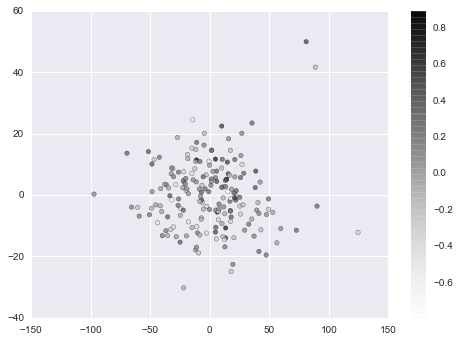

In [37]:
y = dropped_total_data['three_mean_edfa_ela']

plt.scatter(X_trans[:,0], X_trans[:,1], c=y, alpha = 0.8)
plt.colorbar()

[  7.71473137e-01   9.69433223e-02   7.37925306e-02   3.80136065e-02
   1.26907514e-02   6.29129384e-03   3.73491178e-04   9.76845490e-05
   7.36955786e-05   5.97704093e-05   5.25615500e-05   3.46410037e-05
   3.10513858e-05   2.21418306e-05   1.38957862e-05   1.33568905e-05
   1.21270832e-05   9.20918801e-06   3.79291520e-07   3.36082124e-07
   2.41748596e-07   2.18332481e-07   1.68350392e-07   8.94328185e-08
   8.41270753e-08   7.32229326e-08   5.16476627e-08   4.87874833e-08
   4.06818058e-08   4.84160455e-33   4.15710593e-33]


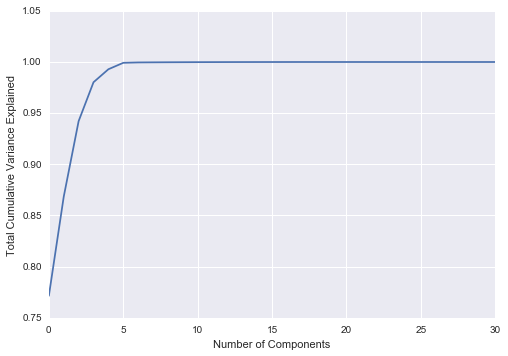

In [38]:
AllPCAs = PCA().fit(X)
print AllPCAs.explained_variance_ratio_
plt.xlabel('Number of Components')
plt.ylabel('Total Cumulative Variance Explained')
plt.plot(np.cumsum(AllPCAs.explained_variance_ratio_))

In [40]:
for i in range(1,100):
    clf = PCA(4)
    X_trans = clf.fit_transform(X)
    knn = neighbors.KNeighborsClassifier(n_neighbors = 1, weights = 'uniform')
    knn.fit(X_trans,y)
    MisClassificationError = 1 - (cross_val_score(knn, X_trans,y,cv=10).mean())
    misclass.append(MisClassificationError)
    
print min(misclass)

ValueError: Unknown label type: array([[ -9.86403380e-02],
       [  2.26781070e-01],
       [ -2.83678920e-01],
       [ -3.17831640e-01],
       [ -3.57967110e-01],
       [  1.17392660e-02],
       [  3.33723990e-01],
       [  1.98959250e-01],
       [  4.35889330e-01],
       [  2.62942590e-02],
       [ -1.87172430e-01],
       [ -4.30578960e-02],
       [  1.74144850e-01],
       [ -9.77640600e-02],
       [  3.25006340e-01],
       [  3.46886180e-02],
       [  6.16485810e-02],
       [  1.49580760e-01],
       [ -1.65612640e-01],
       [ -2.62434180e-01],
       [  5.27011330e-01],
       [  3.93858480e-02],
       [  3.40629990e-01],
       [ -3.30370010e-01],
       [ -1.49541650e-02],
       [ -4.57336750e-01],
       [  3.05036310e-01],
       [  3.89184000e-01],
       [  4.36253640e-01],
       [ -3.11326210e-01],
       [ -1.68774720e-01],
       [ -2.75123830e-01],
       [ -2.87050010e-02],
       [  3.85448460e-01],
       [  6.36176470e-02],
       [  9.79099050e-02],
       [  2.83382560e-01],
       [ -2.81986360e-01],
       [ -4.31215700e-01],
       [ -9.16519980e-02],
       [  3.64597800e-01],
       [  5.53461070e-01],
       [  1.84743910e-01],
       [  2.31890750e-01],
       [  3.02278640e-01],
       [  3.99756220e-01],
       [  2.47549160e-01],
       [  6.60211860e-01],
       [  1.03311680e-01],
       [  1.15629790e-02],
       [  1.60224850e-01],
       [  2.30511870e-01],
       [ -4.14937350e-01],
       [ -1.62378700e-01],
       [ -7.03491420e-02],
       [ -8.10165110e-02],
       [  6.01428630e-01],
       [ -3.46249520e-01],
       [ -4.68521120e-01],
       [  4.67402460e-01],
       [  6.63371260e-01],
       [  9.99421400e-03],
       [  4.11545990e-01],
       [  3.61590420e-01],
       [ -2.93886360e-01],
       [ -1.78733710e-01],
       [  5.39184140e-02],
       [  1.72446090e-01],
       [  4.82820540e-01],
       [ -5.18966020e-02],
       [  1.75003110e-01],
       [  2.13749470e-01],
       [  9.33644700e-02],
       [  3.21352180e-01],
       [ -6.45178110e-02],
       [ -1.09491620e-01],
       [  1.93357500e-01],
       [  7.20485600e-02],
       [ -3.77000460e-02],
       [ -2.28209360e-01],
       [  2.64765830e-01],
       [  1.66227620e-01],
       [ -2.69757810e-01],
       [ -2.08839300e-01],
       [  2.59184030e-01],
       [ -6.69107020e-01],
       [  1.07790470e-01],
       [  2.06371650e-01],
       [ -3.63957020e-01],
       [  4.72568750e-01],
       [  2.94454510e-01],
       [  1.36329930e-01],
       [  2.34103680e-01],
       [ -2.39439500e-01],
       [  1.83638840e-01],
       [  2.83122300e-01],
       [ -2.14764430e-01],
       [  4.22087580e-01],
       [  5.37123750e-02],
       [  3.06692870e-01],
       [ -1.23357870e-01],
       [  7.82918260e-02],
       [ -1.13984850e-01],
       [  3.36704520e-01],
       [  1.96219000e-04],
       [  2.89049240e-01],
       [ -1.61171760e-01],
       [ -4.55624550e-01],
       [ -2.63600290e-01],
       [  5.77565510e-02],
       [  8.89860150e-01],
       [ -2.97811450e-01],
       [  4.10494250e-02],
       [  2.86473870e-01],
       [ -1.63766120e-01],
       [ -5.66450130e-02],
       [  2.70273270e-01],
       [  5.73229310e-02],
       [  4.03423990e-01],
       [  2.32142600e-01],
       [  9.17745750e-02],
       [ -9.65788510e-02],
       [ -1.60290210e-01],
       [ -6.59271550e-02],
       [  1.68444830e-01],
       [  2.34858110e-01],
       [  4.47397350e-01],
       [ -3.02402650e-01],
       [  5.91307950e-02],
       [  3.97878660e-02],
       [ -8.71093790e-02],
       [  1.13106650e-01],
       [  1.44951640e-01],
       [  1.74790440e-01],
       [  6.77110550e-01],
       [  1.24924350e-01],
       [ -2.26729620e-01],
       [ -1.49745880e-01],
       [  1.71985150e-01],
       [  4.13995680e-01],
       [  2.72613500e-01],
       [  2.01635790e-01],
       [  4.68188900e-02],
       [  1.65865300e-01],
       [  2.69359500e-01],
       [ -2.76641010e-01],
       [  5.14558140e-01],
       [  1.67259200e-01],
       [  1.24046150e-01],
       [ -4.36585170e-02],
       [  2.13319540e-01],
       [ -4.58552360e-01],
       [ -1.91704910e-01],
       [ -5.33101000e-03],
       [ -1.88470620e-01],
       [ -8.61348810e-02],
       [  1.55214760e-01],
       [  9.79151730e-02],
       [  1.93353550e-01],
       [  1.18234190e-01],
       [  3.13228430e-01],
       [  9.22054200e-02],
       [ -5.65735880e-01],
       [ -1.16372030e-01],
       [  2.46608290e-01],
       [  2.84569200e-01],
       [  7.62166160e-02],
       [ -7.92893650e-01],
       [ -1.45053510e-01],
       [  3.42220370e-01],
       [  1.59125890e-01],
       [ -5.02459530e-01],
       [ -1.35382680e-01],
       [ -4.32323840e-01],
       [ -3.93363680e-01],
       [ -2.70505520e-01],
       [ -5.39522050e-01],
       [  2.94087950e-01],
       [ -4.54550120e-02],
       [  2.11522360e-01],
       [  2.72714760e-01],
       [  4.87132250e-01],
       [  5.44272120e-01],
       [  2.79295800e-01],
       [ -2.66930430e-01],
       [ -1.09341680e-01],
       [ -2.99132940e-01],
       [ -4.00713950e-01],
       [ -1.06401910e-01],
       [ -4.39294800e-03]])